In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:\\Users\\Vasudha\\Downloads\\covid_data_2020-2021 (1).csv")
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
1,2021-10-11,0,0,0,0,0,Negative,Yes,male,Other
2,2021-10-11,0,0,0,0,0,Negative,No,female,Other
3,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
4,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
...,...,...,...,...,...,...,...,...,...,...
5861475,2020-03-20,1,1,0,0,0,Negative,No,female,Other
5861476,2020-03-20,0,0,0,0,0,Negative,No,male,Other
5861477,2020-03-20,0,0,0,0,0,Negative,No,female,Other
5861478,2020-03-20,0,0,0,0,0,Negative,No,male,Other


In [3]:
data=data.head(50000)

In [4]:


data.shape

(50000, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   test_date            50000 non-null  object
 1   cough                50000 non-null  int64 
 2   fever                50000 non-null  int64 
 3   sore_throat          50000 non-null  int64 
 4   shortness_of_breath  50000 non-null  int64 
 5   head_ache            50000 non-null  int64 
 6   corona_result        50000 non-null  object
 7   age_60_and_above     50000 non-null  object
 8   gender               50000 non-null  object
 9   test_indication      50000 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.8+ MB


In [6]:
data.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [7]:
col=list(data.columns)
col

['test_date',
 'cough',
 'fever',
 'sore_throat',
 'shortness_of_breath',
 'head_ache',
 'corona_result',
 'age_60_and_above',
 'gender',
 'test_indication']

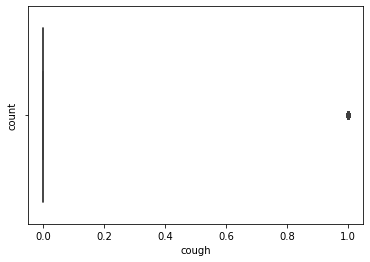

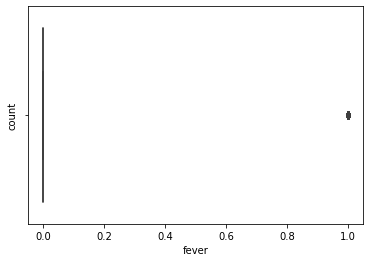

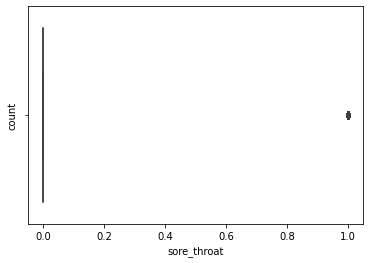

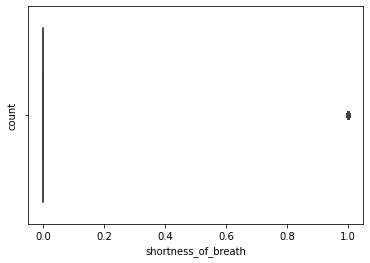

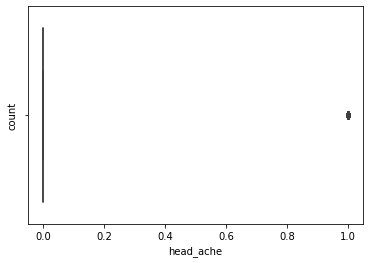

In [8]:
for col_name in col:
    if(data[col_name].dtypes=='int64' or data[col_name].dtypes=='float64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [9]:
data['cough'].value_counts()

cough
0    49307
1      693
Name: count, dtype: int64

In [10]:
data['test_indication'].value_counts()


test_indication
Other                     48722
Contact with confirmed     1241
Abroad                       37
Name: count, dtype: int64

In [11]:
data.dtypes

test_date              object
cough                   int64
fever                   int64
sore_throat             int64
shortness_of_breath     int64
head_ache               int64
corona_result          object
age_60_and_above       object
gender                 object
test_indication        object
dtype: object

In [12]:
data[['test_date','corona_result','age_60_and_above','gender','test_indication']] = data[['test_date','corona_result','age_60_and_above','gender','test_indication']].astype('category')
data['test_date'] = data['test_date'].cat.codes
data['corona_result'] = data['corona_result'].cat.codes
data['age_60_and_above'] = data['age_60_and_above'].cat.codes
data['gender'] = data['gender'].cat.codes
data['test_indication'] = data['test_indication'].cat.codes

In [13]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,4,0,0,0,0,0,0,1,0,2
1,4,0,0,0,0,0,0,1,1,2
2,4,0,0,0,0,0,0,0,0,2
3,4,0,0,0,0,0,0,1,0,2
4,4,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,1,2
49996,0,0,0,0,0,0,0,0,1,2
49997,0,0,0,0,0,0,0,0,1,2
49998,0,0,0,0,0,0,0,0,1,2


In [14]:
data.dtypes

test_date               int8
cough                  int64
fever                  int64
sore_throat            int64
shortness_of_breath    int64
head_ache              int64
corona_result           int8
age_60_and_above        int8
gender                  int8
test_indication         int8
dtype: object

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list = []
for col in data.columns:
    if (col !='corona_result'):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

               feature       VIF
0            test_date  3.162867
1                cough  1.308749
2                fever  1.303489
3          sore_throat  1.200411
4  shortness_of_breath  1.064266
5            head_ache  1.297359
6     age_60_and_above  1.154182
7               gender  1.857304
8      test_indication  4.183418


In [16]:
data.drop(columns=['test_indication'],axis=1,inplace=True)
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,4,0,0,0,0,0,0,1,0
1,4,0,0,0,0,0,0,1,1
2,4,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,1
49996,0,0,0,0,0,0,0,0,1
49997,0,0,0,0,0,0,0,0,1
49998,0,0,0,0,0,0,0,0,1


In [17]:
data.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender'],
      dtype='object')

In [18]:
col_list = []
for col in data.columns:
    if (col !='corona_result'):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

               feature       VIF
0            test_date  1.538414
1                cough  1.308726
2                fever  1.303446
3          sore_throat  1.200254
4  shortness_of_breath  1.064198
5            head_ache  1.296705
6     age_60_and_above  1.122845
7               gender  1.439778


In [19]:
data.drop(columns=['test_date'],axis=1,inplace=True)
data

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,1
49996,0,0,0,0,0,0,0,1
49997,0,0,0,0,0,0,0,1
49998,0,0,0,0,0,0,0,1


In [20]:
col_list = []
for col in data.columns:
    if (col !='corona_result'):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
print(vif_data)

               feature       VIF
0                cough  1.307566
1                fever  1.302389
2          sore_throat  1.200022
3  shortness_of_breath  1.064178
4            head_ache  1.295586
5     age_60_and_above  1.053507
6               gender  1.062303


In [21]:
x=data.drop("corona_result",axis=1)
y=data["corona_result"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [24]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train.values)    
x_test= st_x.transform(x_test.values) 

In [25]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression()  
classifier.fit(x_train, y_train)  

LogisticRegression()

In [26]:
predictions=classifier.predict(x_test)

In [27]:
from sklearn.metrics import classification_report

In [28]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98     14272\n           1       0.76      0.22      0.34       728\n\n    accuracy                           0.96     15000\n   macro avg       0.86      0.61      0.66     15000\nweighted avg       0.95      0.96      0.95     15000\n'

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[14222,    50],
       [  569,   159]], dtype=int64)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9587333333333333

In [31]:
from sklearn.metrics import precision_score
precision_score(y_test,predictions, average='weighted')

0.9517868605170371

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test,predictions, average='weighted')


0.9476730897473885

In [33]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average='weighted')

0.9587333333333333

In [34]:
data.shape

(50000, 8)

###SVM

In [35]:
x_test[0]

array([-0.11965095, -0.12623659, -0.08204093, -0.0410921 , -0.11816822,
       -0.38141234, -0.92609442])

In [36]:
x = np.array([1,1,0,1,0,1,1])  # Example input data
x = np.reshape(x, (1, -1))
x= st_x.transform(x)

In [37]:
y=classifier.predict(x)

In [38]:
from sklearn import svm

classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)

In [39]:
print(y)

[1]


In [40]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98     14272\n           1       0.75      0.37      0.50       728\n\n    accuracy                           0.96     15000\n   macro avg       0.86      0.68      0.74     15000\nweighted avg       0.96      0.96      0.96     15000\n'

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [42]:
confusion_matrix(y_test,y_predict)

array([[14183,    89],
       [  458,   270]], dtype=int64)

In [43]:
accuracy_score(y_test,y_predict)

0.9635333333333334

In [44]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict, average='weighted')

0.9582042636908842

In [45]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict, average='weighted')

0.9575764304704446

In [46]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions, average='weighted')

0.9587333333333333

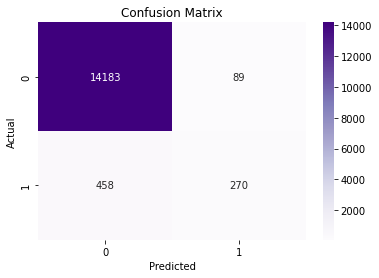

In [47]:

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()




DECISSION TREE

In [48]:
from sklearn.tree import DecisionTreeClassifier
Classifier =  DecisionTreeClassifier()
Classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred = Classifier.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[14161   111]
 [  406   322]]


In [51]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9655333333333334


In [52]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred, average='weighted')

0.9610398968045134

In [53]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='weighted')

0.9613307765267501

In [54]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.9655333333333334

RANDOM FOREST

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=5,criterion='entropy')
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=5)

In [56]:
y_predict=classifier.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [58]:
confusion_matrix(y_test,y_predict)

array([[14162,   110],
       [  405,   323]], dtype=int64)

In [59]:
accuracy_score(y_test,y_predict)

0.9656666666666667

In [60]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict, average='weighted')

0.9612172996078273

In [61]:
from sklearn.metrics import f1_score
f1_score(y_test,y_predict, average='weighted')

0.9614803673332232

In [62]:
from sklearn.metrics import recall_score
recall_score(y_test, y_predict, average='weighted')

0.9656666666666667

In [63]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [64]:
import xgboost
xgboost.XGBClassifier()


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
model=xgboost.XGBClassifier(learning_rate=0.1,
                            max_depth=5,
                            n_estimators=5000,
                            subsample=0.5,
                            colsampl_bytree=0.5,
                            eval_metric='auc',
                            verbosity=1)
eval_set=[(x_test,y_test)]
model.fit(x_train,
          y_train,
          early_stopping_rounds=10,
          eval_set=eval_set,
          verbose=True)

[15:07:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsampl_bytree" } are not used.

[0]	validation_0-auc:0.72268
[1]	validation_0-auc:0.72260
[2]	validation_0-auc:0.72280
[3]	validation_0-auc:0.72279
[4]	validation_0-auc:0.72283
[5]	validation_0-auc:0.73995
[6]	validation_0-auc:0.73995
[7]	validation_0-auc:0.73997
[8]	validation_0-auc:0.74182
[9]	validation_0-auc:0.74180
[10]	validation_0-auc:0.74182
[11]	validation_0-auc:0.74182
[12]	validation_0-auc:0.74181
[13]	validation_0-auc:0.74180
[14]	validation_0-auc:0.74178
[15]	validation_0-auc:0.74178
[16]	validation_0-auc:0.74177
[17]	validation_0-auc:0.74177
[18]	validation_0-auc:0.74178
[19]	validation_0-auc:0.74179
[20]	validation_0-auc:0.74179
[21]	validation_0-auc:0.74179


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsampl_bytree=0.5, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [71]:
y_train_predict=model.predict_proba(x_train)[:,1]
y_predict=model.predict_proba(x_test)[:,1]

In [77]:
y_pred = model.predict(x_test)

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [79]:
roc_auc_score(y_train,y_train_predict)

0.7442008792427337

In [80]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred, average='weighted')

0.9614402451761818

In [81]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='weighted')

0.9618422984206783

In [83]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.9658

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
knn=KNeighborsClassifier(n_neighbors=1)

In [86]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [87]:
y_pred=knn.predict(x_test)

In [88]:
from sklearn.metrics import confusion_matrix,classification_report

In [89]:
confusion_matrix(y_test,y_pred)

array([[14197,    75],
       [  529,   199]], dtype=int64)

In [90]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.99      0.98     14272\n           1       0.73      0.27      0.40       728\n\n    accuracy                           0.96     15000\n   macro avg       0.85      0.63      0.69     15000\nweighted avg       0.95      0.96      0.95     15000\n'

In [91]:
from sklearn import svm

classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)
y_predict=classifier.predict(x_test)

In [92]:
from sklearn.metrics import classification_report
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98     14272\n           1       0.75      0.37      0.50       728\n\n    accuracy                           0.96     15000\n   macro avg       0.86      0.68      0.74     15000\nweighted avg       0.96      0.96      0.96     15000\n'

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [94]:
confusion_matrix(y_test,y_predict)

array([[14183,    89],
       [  458,   270]], dtype=int64)

In [95]:
accuracy_score(y_test,y_predict)

0.9635333333333334

In [96]:
from sklearn.metrics import precision_score
precision_score(y_test,y_predict, average='weighted')

0.9582042636908842

In [97]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='weighted')

0.9509262571209053

In [98]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.9597333333333333